# Cartopy Tutorial
this tutorial is old cartopy has been updated so some components of this notebook may not be working fully
### In this tutorial we will cover:
- Projections
- Features
- Scatter/ Plotting
- Contours/ Contour fills
- Quiver (Plotting vectors)

We will start by importing the necessary libraries

In [1]:
#makes the plots interactive (use %matplotib Qt5 to make the plots appear in a seperate window like in spyder)
%matplotlib notebook
import matplotlib.pyplot as plt  #necessary for creating figures and axes
import cartopy.crs as ccrs #This contains all the projections we need

### First I will set up a figure and use a common projection within our group called Lambert Conformal
It is not necessary to understand all the different projections at this stage and within our group you will find this is the projection most useful

<IPython.core.display.Javascript object>


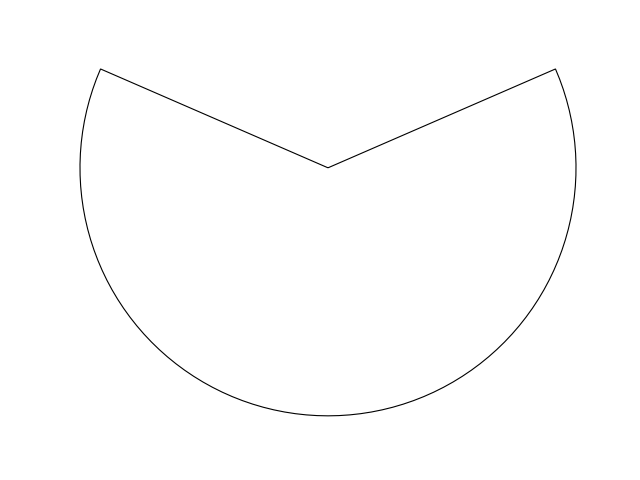

In [2]:
fig= plt.figure() # Create a figure
lon_centre, lat_centre= 20, 75 # This should be the centre of the region you are interested in
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre)) 

You can see here that the plot is a little boring. Its just a broken circle with nothing on it.
### Next we add features

<IPython.core.display.Javascript object>


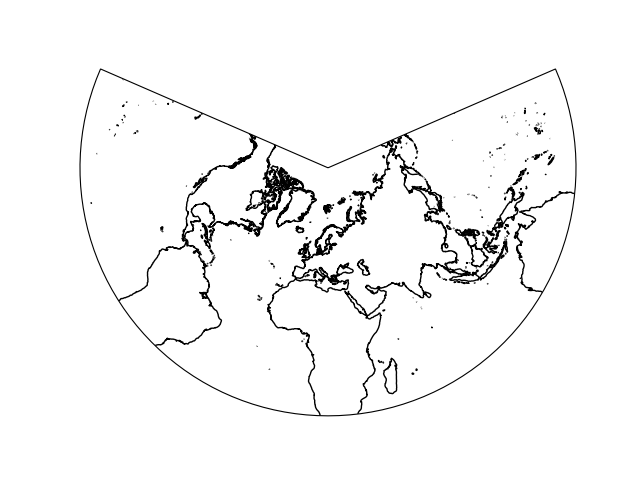

In [3]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')

Coastlines aren't the only things you can add in cartopy...

<IPython.core.display.Javascript object>


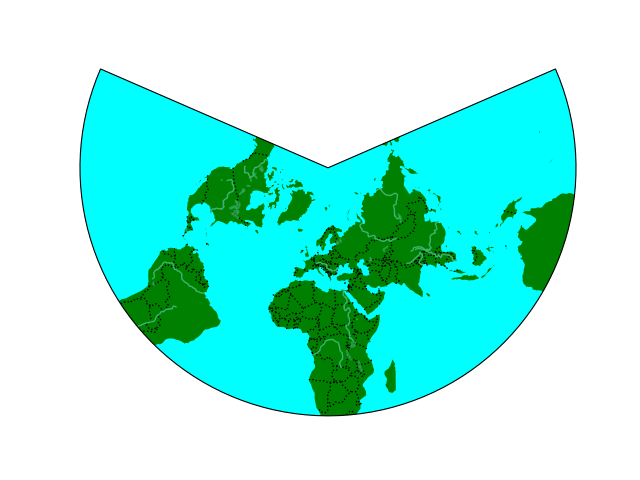

In [4]:
from cartopy import feature # load features from cartopy
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# This will show border between countries and makes it plotted as a dotted line
ax.add_feature(feature.BORDERS, linestyle=':')
# This will show lakes, alpha=0.5 means that it is half faded, face color picks what colour they will appear as
ax.add_feature(feature.LAKES, alpha=0.5, facecolor= 'mediumseagreen')
# This will add rivers, edge color is used but can be used elsewhere to pick a color for the edges of the feature
ax.add_feature(feature.RIVERS, edgecolor= 'mediumseagreen')
# This will add the land
ax.add_feature(feature.LAND, facecolor='green')
# This will add the oceans
ax.add_feature(feature.OCEAN, facecolor='aqua')

So this looks a little nicer, but of course you're unlikely to use this to look at the entire northen hemisphere. It is more likely that you want to look at a specific region.

<IPython.core.display.Javascript object>


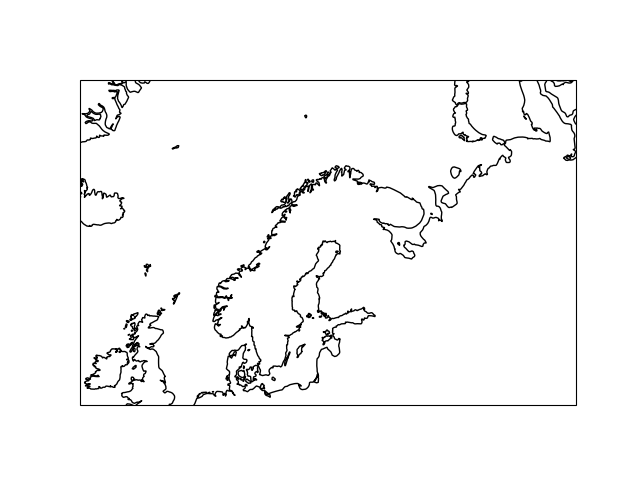

In [5]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
# Pick the longitude and lattitude limits you would like for the region of interest
lon_min, lon_max= -10, 55
lat_min, lat_max= 50, 75
# Set extent will then adjust the plot accordingly
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

<IPython.core.display.Javascript object>


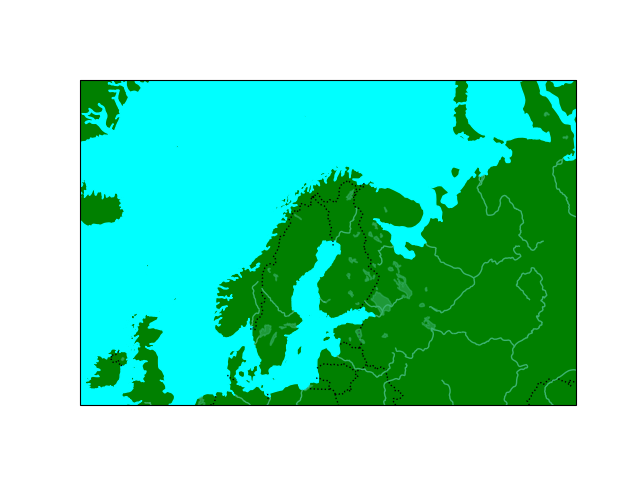

In [6]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# This will show border between countries and makes it plotted as a dotted line
ax.add_feature(feature.BORDERS, linestyle=':')
# This will show lakes, alpha=0.5 means that it is half faded, face color picks what colour they will appear as
ax.add_feature(feature.LAKES, alpha=0.5, facecolor= 'mediumseagreen')
# This will add rivers, edge color is used but can be used elsewhere to pick a color for the edges of the feature
ax.add_feature(feature.RIVERS, edgecolor= 'mediumseagreen')
# This will add the land
ax.add_feature(feature.LAND, facecolor='green')
# This will add the oceans
ax.add_feature(feature.OCEAN, facecolor='aqua')
# Set extent will then adjust the plot accordingly
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

You don't have to use set extent to focus on the a certain region
### Next we use scatter
The import thing for plotting in cartopy is to use a transform otherwise it will not understand what the co-ordinates you have provided are

<IPython.core.display.Javascript object>


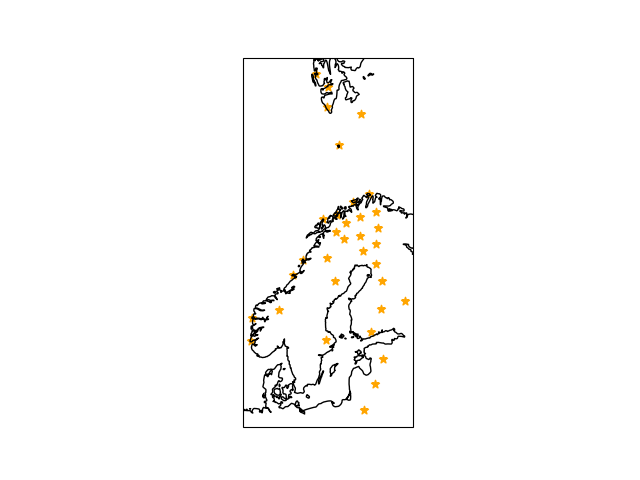

In [7]:
# Here I have the lattitude and longitude of some magnetometers from the IMAGE network
MagLat=  [58.26, 59.21, 59.90, 60.50, 61.08, 62.07, 62.30, 
                   62.77, 64.52, 64.61, 64.94, 65.90, 66.11, 66.40, 
                   66.90, 67.37, 67.83, 68.02, 68.35, 68.56, 69.02, 
                   69.30, 69.46, 69.66, 69.76, 70.54, 71.09, 74.50, 
                   76.51, 77.00, 78.20, 78.92, 54.01, 56.17]
MagLon=  [26.46,  5.24, 17.35, 24.65,  4.84,  9.12, 26.65, 
                   30.97, 27.23, 18.75, 10.98, 26.41, 12.50, 16.98, 
                   24.08, 26.63, 20.42, 23.53, 18.82, 27.29, 20.79, 
                   16.03, 23.70, 18.94, 27.01, 22.22, 25.79, 19.20, 
                   25.01, 15.60, 15.82, 11.95, 23.18, 24.86]
# Lets use scatter to show their locations on the map
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
# The only transform you can use with lambert conformal is PlateCarree
# for most other map set ups the transform should be the same as the map projection 
# but this has not been implemented yet in cartopy. However, PlateCarree works exactly as we want
ax.scatter(MagLon, MagLat, transform= ccrs.PlateCarree(), marker='*', color='orange')

<IPython.core.display.Javascript object>


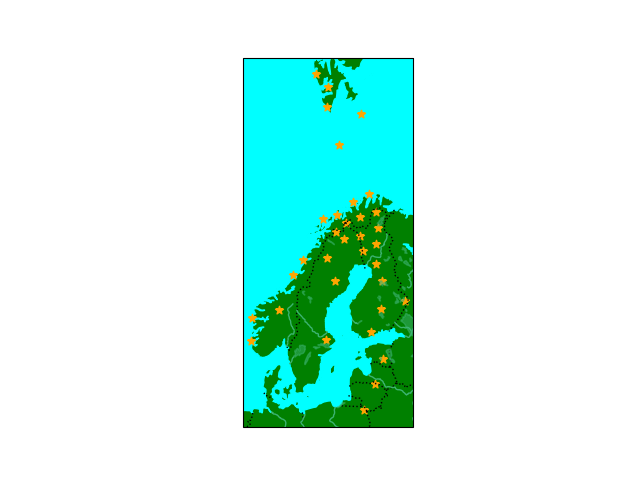

In [8]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# This will show border between countries and makes it plotted as a dotted line
ax.add_feature(feature.BORDERS, linestyle=':')
# This will show lakes, alpha=0.5 means that it is half faded, face color picks what colour they will appear as
ax.add_feature(feature.LAKES, alpha=0.5, facecolor= 'mediumseagreen')
# This will add rivers, edge color is used but can be used elsewhere to pick a color for the edges of the feature
ax.add_feature(feature.RIVERS, edgecolor= 'mediumseagreen')
# This will add the land
ax.add_feature(feature.LAND, facecolor='green')
# This will add the oceans
ax.add_feature(feature.OCEAN, facecolor='aqua')
# The only transform you can use with lambert conformal is PlateCarree
# for most other map set ups the transform should be the same as the map projection 
# but this has not been implemented yet in cartopy. However, PlateCarree works exactly as we want
ax.scatter(MagLon, MagLat, transform= ccrs.PlateCarree(), marker='*', color='orange')

You can see that when using scatter the map automatically focuses on the region you have plotted on. You can of course use set extent if you are not happy with the region it has focused on
### Next plotting a line

<IPython.core.display.Javascript object>


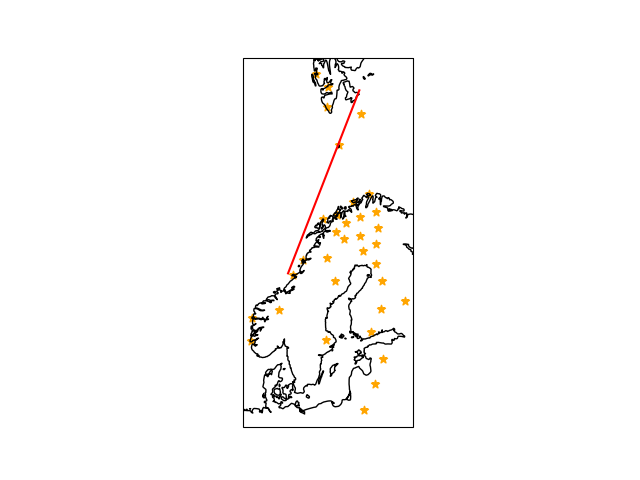

In [9]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
# The only transform you can use with lambert conformal is PlateCarree
# for most other map set ups the transform should be the same as the map projection 
# but this has not been implemented yet in cartopy. However, PlateCarree works exactly as we want
ax.scatter(MagLon, MagLat, transform= ccrs.PlateCarree(), marker='*', color='orange')
# Use the same tranform for plotting a line
ax.plot([10, 25], [65, 78], transform= ccrs.PlateCarree(), color= 'red')

You can see that plotting a line is done in a similar way to scatter
### Next contours and contour fills

<IPython.core.display.Javascript object>


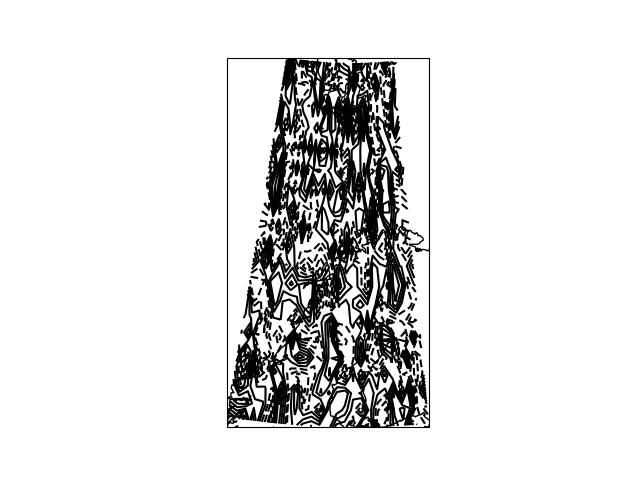

In [10]:
import numpy as np
lon, lat= np.meshgrid(np.arange(5, 30), np.arange(60, 80)) # Creating 2D grid
# Creating some random values for the grid with a uniform distribution
values= np.random.uniform(low=-20, high=20, size= lon.shape)

fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
# Again you can see that all this is needed is the transform
ax.contour(lon, lat, values, transform=ccrs.PlateCarree(), colors='black')

<IPython.core.display.Javascript object>


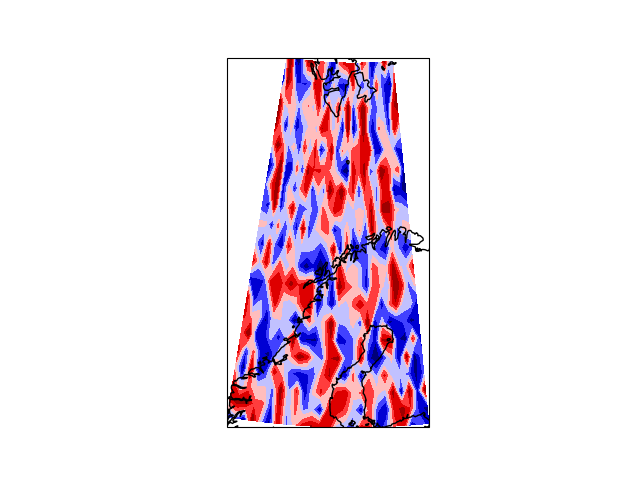

In [11]:
fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
ax.contourf(lon, lat, values, transform=ccrs.PlateCarree(), cmap='seismic')

### Quivers
This one is not as simple, quivers have not been fixed properly for the projection we use. However, Kalle wrote code that fixes that (phew!)

<IPython.core.display.Javascript object>


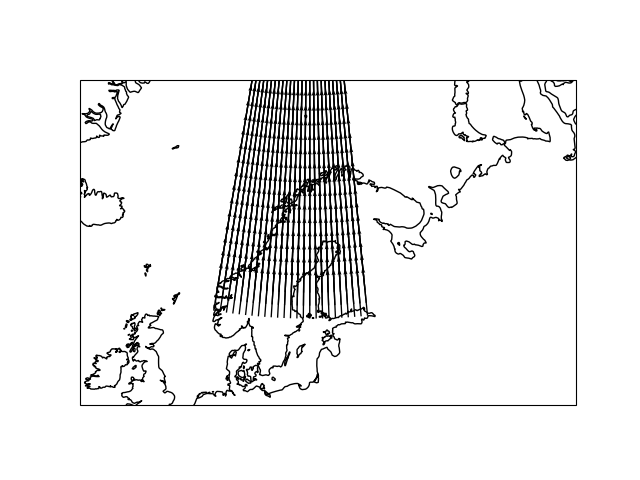

In [12]:
def Geocentric_to_PlateCarree_vector_components(east, north, latitude):
    """ convert east north vector components to Plate Carree projection 

        parameters
        ----------
        east : array-like
            eastward components
        north : array-like
            westward components
        latitude : array-like
            latitude of each vector

        returns
        -------
        east, north in Plate Carree projection
        Preserveres shape and norm

    """
    magnitude = np.sqrt(east**2 + north**2)

    east_pc = east / np.cos(latitude * np.pi / 180)

    magnitude_pc = np.sqrt(east_pc**2 + north**2)

    east_pc  = east_pc * magnitude / magnitude_pc
    north_pc = north * magnitude / magnitude_pc

    return east_pc, north_pc

fig= plt.figure() # Create a figure
# Add a subplot and set the projection
ax= fig.add_subplot(111, projection= ccrs.LambertConformal(lon_centre, lat_centre))
# Add the coastlines with a certain resolution, the number can be changed there are many options.
ax.coastlines(resolution='50m')
# Creating 2D grid, not neccesary for quiver can be 1D inputs for x and y
lon, lat= np.meshgrid(np.arange(5, 30), np.arange(60, 80)) 
# Create vectors that are 0 in the east direction and 1 in the north direction
vec_east, vec_north= np.zeros(lat.shape), np.ones(lon.shape)
# Convert them so they can be used by cartopy using Kalle's code
new_east, new_north= Geocentric_to_PlateCarree_vector_components(vec_east, vec_north, lat)
# Treat it the same a plotting or using scatter (transform is PlateCarree)
ax.quiver(lon, lat, new_east, new_north, transform=ccrs.PlateCarree(), scale=10)
# Adjust the plot so its bigger and looks nicer
ax.set_extent([lon_min, lon_max, lat_min, lat_max])